# Runge-Kuta 4

Primero escribo el programa que me resuelve el RK4. Los parámetros de la función RK4 son:
- f, la función del sistema de ecuaciones.
- y0, las condiciones iniciales del problema
- t0, tiempo inicial
- tmax, tiempo final
- n, número de iteraciones

In [7]:
function RK4(f::Function, y0::Array, t0, tmax, n)
    sol=[]
    y=y0
    t=collect(linspace(t0,tmax,n))
    for j=1:n
        h=(t[2]-t[1])
        k1=f(y,t[j])
        k2=f(y+k1*(h/2),t[j]+h/2)
        k3=f(y+k2*(h/2),t[j]+h/2)
        k4=f(y+k3*h,t[j]+h)
        y=y+(h/6)*(k1+2k2+2k3+k4)
        sol=push!(sol,[t[j],y])
    end
    sol
end

RK4 (generic function with 1 method)

In [8]:
using PyPlot

-----------------
**Oscilador armónico**

Como primer ejemplo voy a resolver el oscilador armónico amortiguado y forzado.

La funcion agarra un arreglo y, cuya primera entrada es la posición y la segunda entrada es la velocidad. la función mete esos valores al sistema de ecuaciones y arroja un arreglo donde la primera entrada es la derivada de la posición y la segunda entrada es la derivada de la velocidad.


In [9]:
function OA(y::Array, t)
    q=0.1
    b=0.03
    w0=1
    [y[2],-q*y[2]-sin(y[1])+b*cos(w0*t)]
end

OA (generic function with 1 method)

Esta función se usa como argumento de la función RK4 y como parámetros se pone:
- [x,v] = [1,0] (condiciones iniciales)
- t0=0
- tmax=100
- n=50000

In [13]:
R=RK4(OA,[1,0],0,100,50000);

El arreglo resultante contiene los tiempos en la primera columna, las posiciones en la segunda columna y las veocidades en la tercera. A continuación se extrae y grafica dicha información.

In [11]:
tiempo=[]
for i=1:length(R)
    tiempo=push!(tiempo,R[i][1])
end
tiempo;

ang=[]
for i=1:length(R)
    ang=push!(ang,R[i][2])
end

vel=[]
for i=1:length(R)
    vel=push!(vel,R[i][3])
end

In [20]:
R

50000-element Array{Any,1}:
 [0.0,0.9999983771015802,-0.0016228115946721987]                 
 [0.002000040000800016,0.9999935088423337,-0.0032452953859459475]
 [0.004000080001600032,0.9999853958810816,-0.004867448172983455] 
 [0.006000120002400048,0.9999740388830453,-0.006489266756194142] 
 [0.008000160003200064,0.9999594385198445,-0.00811074793718725]  
 [0.01000020000400008,0.9999415954694947,-0.009731888518724485]  
 [0.012000240004800097,0.9999205104164047,-0.011352685304672722] 
 [0.014000280005600113,0.9998961840513748,-0.012973135099956741] 
 [0.01600032000640013,0.9998686170715946,-0.014593234710512026]  
 [0.018000360007200143,0.9998378101806407,-0.016212980943237608] 
 [0.02000040000800016,0.9998037640884754,-0.017832370605948954]  
 [0.022000440008800175,0.9997664795114445,-0.019451400507330924] 
 [0.024000480009600193,0.9997259571722757,-0.021070067456890766] 
 ⋮                                                               
 [99.9779995599912,-0.18539562478692614,0.238213

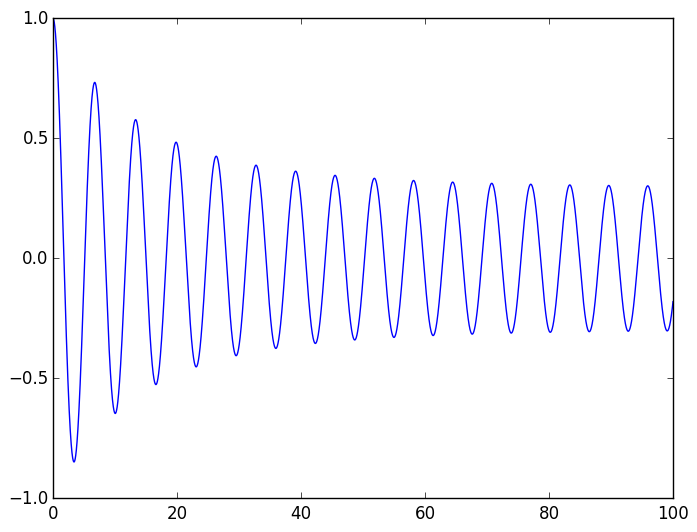

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0afa8c6f10>

In [12]:
plot(tiempo, ang)

-----------------

**Problema de 3 cuerpos**

Para complicar un poco las cosas voy a resolve el problema de tres cuerpos con mi programa. 

Primero defino la función de las ecuaciones diferenciales de la siguiente manera:

In [23]:
function tres_C(g::Array,t)
    m0 = 5.0
    m1 = 4.0
    m2 = 3.0
    
    r0x=g[1]
    r0y=g[2]
    r1x=g[5]
    r1y=g[6]
    r2x=g[9]
    r2y=g[10]
    
    v0x=g[3] 
    v0y=g[4]
    v1x=g[7] 
    v1y=g[8]
    v2x=g[11]
    v2y=g[12]

    dr0x=v0x
    dr1x=v1x
    dr2x=v2x
    dr0y=v0y
    dr1y=v1y
    dr2y=v2y
    
    d0x  = (r2x - r1x) /  (sqrt((r2x-r1x)^2 + (r2y-r1y)^2)^3.0 ) 
    d1x  = (r0x - r2x) /  (sqrt((r0x-r2x)^2 + (r0y-r2y)^2)^3.0 )
    d2x  = (r1x - r0x) /  (sqrt((r1x-r0x)^2 + (r1y-r0y)^2)^3.0 )   
    d0y  = (r2y - r1y) /  (sqrt((r2x-r1x)^2 + (r2y-r1y)^2)^3.0 ) 
    d1y  = (r0y - r2y) /  (sqrt((r0x-r2x)^2 + (r0y-r2y)^2)^3.0 )
    d2y  = (r1y - r0y) /  (sqrt((r1x-r0x)^2 + (r1y-r0y)^2)^3.0 ) 
    
    dv0x = m1*d2x - m2*d1x
    dv1x = m2*d0x - m0*d2x
    dv2x = m0*d1x - m1*d0x
    dv0y = m1*d2y - m2*d1y
    dv1y = m2*d0y - m0*d2y
    dv2y = m0*d1y - m1*d0y
    
    res=[dr0x, dr0y, dv0x, dv0y, dr1x, dr1y, dv1x, dv1y, dr2x, dr2y, dv2x, dv2y]
end

tres_C (generic function with 1 method)

A continuación se eligen los parámetros, condiciones iniciales y que sean 1,000,000 pasos. Se resuelve usando la función RK4 y se mide el tiempo que tarda en resolver.

In [24]:
gi0 = [ 1.0, -1.0, 0.0, 0.0]
gi1 = [ 1.0,  3.0, 0.0, 0.0]
gi2 = [-2.0, -1.0, 0.0, 0.0]
g0  = [gi0, gi1, gi2]
tic()
R1=RK4(tres_C,g0,0,10,1000000)
toc()

elapsed time: 261

261.783791746

Ahora se extraen los vectores del arreglo de soluciones y se grafican para ver las 3 trayectorias.

In [25]:
tiempo1=[]
for i=1:length(R1)
   
    tiempo1=push!(tiempo1,R1[i][1])
end
tiempo1;

pos1x=[]
for i=1:length(R1)
    pos1x=push!(pos1x,R1[i][2])
end

pos1y=[]
for i=1:length(R1)
    pos1y=push!(pos1y,R1[i][3])
end

pos2x=[]
for i=1:length(R1)
    pos2x=push!(pos2x,R1[i][6])
end

pos2y=[]
for i=1:length(R1)
    pos2y=push!(pos2y,R1[i][7])
end

pos3x=[]
for i=1:length(R1)
    pos3x=push!(pos3x,R1[i][10])
end

pos3y=[]
for i=1:length(R1)
    pos3y=push!(pos3y,R1[i][11])
end

.783791746 seconds


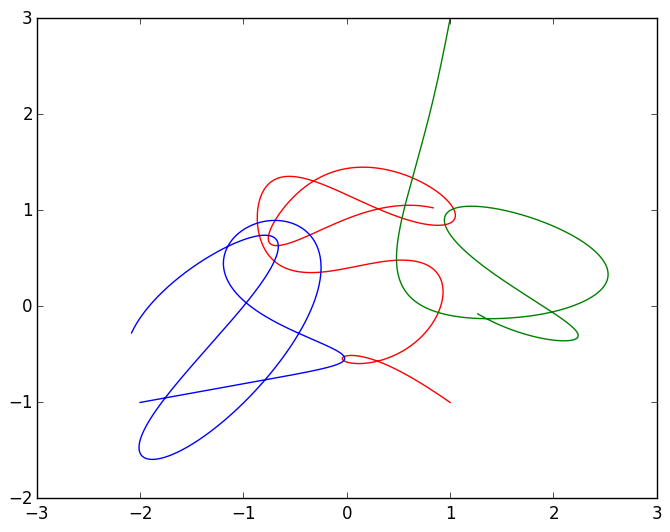

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee8d555490>

In [26]:
plot(pos1x, pos1y, "-r")
plot(pos2x, pos2y, "-g")
plot(pos3x, pos3y, "-b")

-----------------------
Se tardó 261 segundos en resolver para 1,000,000 pasos asi que ahora lo reduciré a 100,000 pasos.

In [27]:
gi0 = [ 1.0, -1.0, 0.0, 0.0]
gi1 = [ 1.0,  3.0, 0.0, 0.0]
gi2 = [-2.0, -1.0, 0.0, 0.0]
g0  = [gi0, gi1, gi2]
tic()
R1=RK4(tres_C,g0,0,10,100000)
toc()

elapsed time: 17

17.049604861

Ya es un tiempo mas decente pero aun es lento.

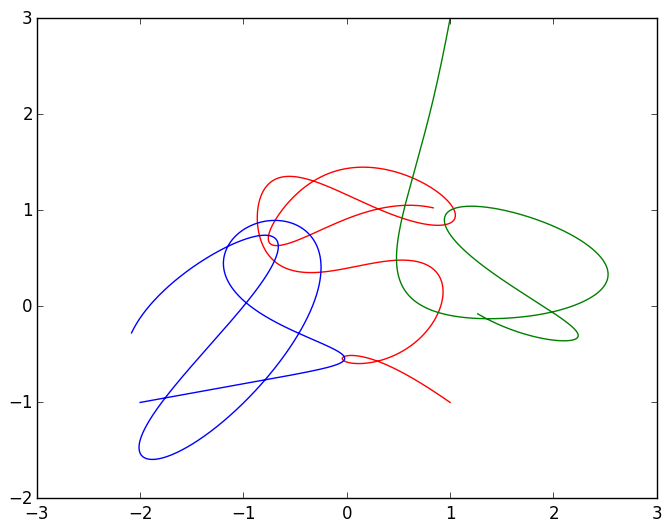

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee8d48b550>

.049604861 seconds


In [28]:
tiempo1=[]
for i=1:length(R1)
   
    tiempo1=push!(tiempo1,R1[i][1])
end
tiempo1;

pos1x=[]
for i=1:length(R1)
    pos1x=push!(pos1x,R1[i][2])
end

pos1y=[]
for i=1:length(R1)
    pos1y=push!(pos1y,R1[i][3])
end

pos2x=[]
for i=1:length(R1)
    pos2x=push!(pos2x,R1[i][6])
end

pos2y=[]
for i=1:length(R1)
    pos2y=push!(pos2y,R1[i][7])
end

pos3x=[]
for i=1:length(R1)
    pos3x=push!(pos3x,R1[i][10])
end

pos3y=[]
for i=1:length(R1)
    pos3y=push!(pos3y,R1[i][11])
end

plot(pos1x, pos1y, "-r")
plot(pos2x, pos2y, "-g")
plot(pos3x, pos3y, "-b")

---------------------------------

Para 50,000 pasos:

In [29]:
gi0 = [ 1.0, -1.0, 0.0, 0.0]
gi1 = [ 1.0,  3.0, 0.0, 0.0]
gi2 = [-2.0, -1.0, 0.0, 0.0]
g0  = [gi0, gi1, gi2]
tic()
R1=RK4(tres_C,g0,0,10,50000)
toc()

elapsed time: 9

9.048400365

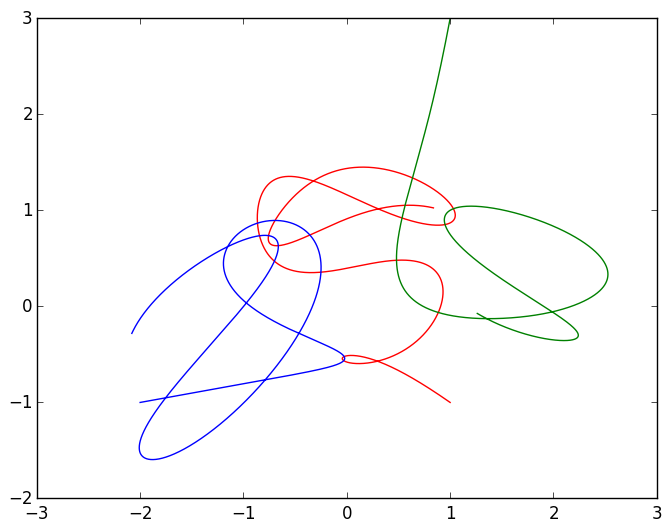

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee8d3bee50>

.048400365 seconds


In [30]:
tiempo1=[]
for i=1:length(R1)
   
    tiempo1=push!(tiempo1,R1[i][1])
end
tiempo1;

pos1x=[]
for i=1:length(R1)
    pos1x=push!(pos1x,R1[i][2])
end

pos1y=[]
for i=1:length(R1)
    pos1y=push!(pos1y,R1[i][3])
end

pos2x=[]
for i=1:length(R1)
    pos2x=push!(pos2x,R1[i][6])
end

pos2y=[]
for i=1:length(R1)
    pos2y=push!(pos2y,R1[i][7])
end

pos3x=[]
for i=1:length(R1)
    pos3x=push!(pos3x,R1[i][10])
end

pos3y=[]
for i=1:length(R1)
    pos3y=push!(pos3y,R1[i][11])
end

plot(pos1x, pos1y, "-r")
plot(pos2x, pos2y, "-g")
plot(pos3x, pos3y, "-b")